# Pressure signal Statistical feature extraction


## Introduction

This code is part of Fuel leak detection and location based on NPW.
In addition to the features calculated based on the entire signal in the time domain and DWT, time intervals have been implemented along the signal. Intervals were static and dynamic.
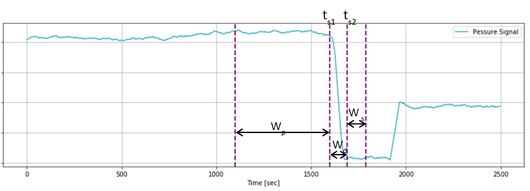

## Imports and Global Definitions

In [1]:
import numpy as np
import pandas as pd

In [2]:
from detecta import detect_peaks

In [3]:
fs = 50.0       # sample rate, Hz
T = 50.0         # seconds
n = int(T * fs) # total number of samples (2500)
selected_columns = ['File','PT','StartTime','Label','LeakTime']

In [4]:
label_colors = ["#F58C41", "#2FAFC6", "#800080", "#AF1946", 
                "#46A5E1", "#522A64", "#A3DB05", "#FC6514"]

In [5]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

## Data Loading

In [6]:
ds = 'Train' # the data set name 'Train' or 'Test'

In [7]:
#read data file
df= pd.read_csv(ds+'_Data.csv')
df

,File,PT,StartTime,Label,LeakTime,s0,s1,s2,s3,s4,...,s2490,s2491,s2492,s2493,s2494,s2495,s2496,s2497,s2498,s2499
0,2559,HDR3039,2019-11-06-13:32:24.20,0,7,1118.682449,1118.520510,1118.358571,1118.196633,1118.034694,...,1092.985714,1093.014694,1093.043673,1093.072653,1093.101633,1093.130612,1093.159592,1093.188571,1093.217551,1093.246531
1,2714,GLT3023,2019-11-12-06:56:56.300,0,1168,1248.214694,1248.299286,1248.383878,1248.468469,1248.553061,...,1364.319388,1364.329796,1364.340204,1364.350612,1364.361020,1364.371429,1364.381837,1364.392245,1364.402653,1364.413061
2,766,HDR3039,2017-03-16-16:25:39.60,0,1206,842.676735,842.685102,842.693469,842.701837,842.710204,...,764.152041,764.148571,764.145102,764.141633,764.138163,764.134694,764.131224,764.127755,764.124286,764.120816
3,302,ESH3427,2017-01-26-11:53:42.530,0,1960,1413.068571,1413.203469,1413.338367,1413.473265,1413.608163,...,1483.441327,1483.440816,1483.440306,1483.439796,1483.439286,1483.438776,1483.438265,1483.437755,1483.437245,1483.436735
4,2024,ASK3746,2019-05-21-09:15:36.150,0,21,2427.726531,2427.537245,2427.347959,2427.158673,2426.969388,...,2456.765816,2456.750204,2456.734592,2456.718980,2456.703367,2456.687755,2456.672143,2456.656531,2456.640918,2456.625306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,735,HDR3037,2017-03-15-10:29:45.180,1,1772,1658.201633,1658.204286,1658.206939,1658.209592,1658.212245,...,1655.105102,1655.121633,1655.138163,1655.154694,1655.171224,1655.187755,1655.204286,1655.220816,1655.237347,1655.253878
2236,208,ASH3041,2017-01-16-07:11:58.180,0,2019,530.366531,530.444796,530.523061,530.601327,530.679592,...,508.823980,508.795918,508.767857,508.739796,508.711735,508.683673,508.655612,508.627551,508.599490,508.571429
2237,1807,ASH3036,2018-07-12-08:16:56.460,0,1930,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000,...,2437.600000,2437.599184,2437.598367,2437.597551,2437.596735,2437.595918,2437.595102,2437.594286,2437.593469,2437.592653
2238,186,ESH3437,2017-01-13-04:02:48.120,0,269,2363.380408,2363.543980,2363.707551,2363.871122,2364.034694,...,2359.479592,2359.448980,2359.418367,2359.387755,2359.357143,2359.326531,2359.295918,2359.265306,2359.234694,2359.204082


## Features Extraction Function

### Statistical Featurs
Mean, std, slope, min, max, argMin, argMax

In [8]:
def get_SF_df(val_df,calcPeaks = 1,prefix = ''):
    feature_df = select_columns(df, selected_columns)
    if prefix != '':
        prefix = prefix+'_'
    for  index, row in val_df.iterrows():
        smp = np.array(row)
        feature_df.at[index,prefix+'Mean'] = smp.mean()
        feature_df.at[index,prefix+'Std'] = smp.std()
        feature_df.at[index,prefix+'Max'] = smp.max()
        feature_df.at[index,prefix+'Min'] = smp.min()
        feature_df.at[index,prefix+'argMax'] = np.argmax(smp)
        feature_df.at[index,prefix+'argMin'] = np.argmin(smp)
        if calcPeaks:
            clear_output(wait=True)
            print(index)
            peaks = detect_peaks(smp, threshold=0.03, valley=True, show=True)
            feature_df.at[index,prefix+'peaks'] = peaks.size
    return feature_df

#### Calculate the slope

In [9]:
def calcEvrg(val_df,interval):
    feature_df = select_columns(df, selected_columns)
    maxCol = len(val_df.columns)
    for  i in range(0,maxCol-1):
        feature_df['a'+str(i)] = 0
        count = 0
        for j in range (i,i+interval-1):
            if j < maxCol-1:
                feature_df['a'+str(i)] = feature_df['a'+str(i)] + val_df.iloc[:,j]
                count = count + 1
        feature_df['a'+str(i)] =feature_df['a'+str(i)]/count
    return feature_df

In [10]:
def calcSlope(val_df,interval):
    feature_df = select_columns(df, selected_columns)
    maxCol = len(val_df.columns)
    for  i in range(0,maxCol-interval-1):
        feature_df['a'+str(i)] = 0
        count = 0
        for j in range (i,i+interval-1):
            if j+interval < maxCol-1:
                feature_df['a'+str(i)] = feature_df['a'+str(i)] + (val_df.iloc[:,j+interval] - val_df.iloc[:,j])
                count = count + 1
        feature_df['a'+str(i)] =feature_df['a'+str(i)]/2*count
    return feature_df

## Entire time series FE

In [11]:
val_df = df.drop(selected_columns,axis =1)

In [12]:
features = get_SF_df(val_df,0)
features

,File,PT,StartTime,Label,LeakTime,Mean,Std,Max,Min,argMax,argMin
0,2559,HDR3039,2019-11-06-13:32:24.20,0,7,1103.506837,13.055633,1126.877551,1087.877551,1684.0,387.0
1,2714,GLT3023,2019-11-12-06:56:56.300,0,1168,1322.945433,31.952953,1364.413061,1248.214694,2499.0,0.0
2,766,HDR3039,2017-03-16-16:25:39.60,0,1206,816.622727,30.016288,846.734694,764.120816,1137.0,2499.0
3,302,ESH3427,2017-01-26-11:53:42.530,0,1960,1479.348184,26.672224,1514.693878,1413.068571,1853.0,0.0
4,2024,ASK3746,2019-05-21-09:15:36.150,0,21,2428.766547,25.507517,2459.040816,2385.979592,1081.0,317.0
...,...,...,...,...,...,...,...,...,...,...,...
2235,735,HDR3037,2017-03-15-10:29:45.180,1,1772,1655.504155,4.182852,1658.387755,1643.734694,36.0,2005.0
2236,208,ASH3041,2017-01-16-07:11:58.180,0,2019,528.020947,8.565154,534.693878,508.367347,808.0,2444.0
2237,1807,ASH3036,2018-07-12-08:16:56.460,0,1930,2447.621167,5.531561,2451.877551,2435.612245,247.0,2170.0
2238,186,ESH3437,2017-01-13-04:02:48.120,0,269,2368.943433,7.303182,2382.693878,2358.591837,217.0,1900.0


In [13]:
featureSlope = calcSlope(val_df,50)

In [14]:
val_Slope = featureSlope.drop(selected_columns,axis =1)
features_S = get_SF_df(val_Slope,0)

In [15]:
feature_d2 = calcSlope(val_Slope,10)

In [16]:
val_d2 = feature_d2.drop(selected_columns,axis =1)
features_Sd2 = get_SF_df(val_d2,0)

In [17]:
features['MinSlope'] = features_S['Min']
features['argMinSlope'] = features_S['argMin']
features['t_s1'] = features_S['argMin']
features['t_s2'] = features_Sd2['argMax']
features['k2'] = features['t_s2'] - features['t_s1']
features_dist = features.drop(selected_columns, axis = 1)


In [18]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in features_dist.columns:
    plt.subplot(9, 3, j+1)
    j += 1
    sns.distplot(features_dist[i][features['Label']==0], color='g', label = 'Not Leak')
    sns.distplot(features_dist[i][features['Label']==1], color='r', label = 'Leak')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

NameError: name 'plt' is not defined

## Interval 200-700 time series W1

In [ ]:
val_df_w1 = df.loc[:, 's200':'s700']
val_df_w1.head()

In [ ]:
features_w1 = get_SF_df(val_df_w1,0,'W1')
features_w1

In [ ]:
featureSlope = calcSlope(val_df_w1,50)
val_Slope_w1 = featureSlope.drop(selected_columns,axis =1)
features_S_w1 = get_SF_df(val_Slope_w1,0)

In [ ]:
features_w1['W1_MinSlope'] = features_S_w1['Min']
features_w1['W1_argMinSlope'] = features_S_w1['argMin']

features_dist_w1 = features_w1.drop(selected_columns, axis = 1)

In [ ]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in features_dist_w1.columns:
    plt.subplot(9, 3, j+1)
    j += 1
    sns.distplot(features_dist_w1[i][features_w1['Label']==0], color='g', label = 'Not Leak')
    sns.distplot(features_dist_w1[i][features_w1['Label']==1], color='r', label = 'Leak')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

## Interval 900-1400 time series W2

In [ ]:
val_df_w2 = df.loc[:, 's900':'s1400']
features_w2 = get_SF_df(val_df_w2,0,'W2')
features_w2

In [ ]:
featureSlope = calcSlope(val_df_w2,20)
val_Slope_w2 = featureSlope.drop(selected_columns,axis =1)
features_S_w2 = get_SF_df(val_Slope_w2,0)

In [ ]:
features_w2['W2_MinSlope'] = features_S_w2['Min']
features_w2['W2_argMinSlope'] = features_S_w2['argMin']

features_dist_w2 = features_w2.drop(selected_columns, axis = 1)

In [ ]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in features_dist_w2.columns:
    plt.subplot(9, 3, j+1)
    j += 1
    sns.distplot(features_dist_w2[i][features_w2['Label']==0], color='g', label = 'Not Leak')
    sns.distplot(features_dist_w2[i][features_w2['Label']==1], color='r', label = 'Leak')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

## Interval 1300-1800 time series W3

In [ ]:
val_df_w3 = df.loc[:, 's1300':'s1800']
features_w3 = get_SF_df(val_df_w3,0,'W3')
features_w3

In [ ]:
featureSlope = calcSlope(val_df_w3,20)
val_Slope_w3 = featureSlope.drop(selected_columns,axis =1)
features_S_w3 = get_SF_df(val_Slope_w3,0)

In [ ]:
features_w3['W3_MinSlope'] = features_S_w3['Min']
features_w3['W3_argMinSlope'] = features_S_w3['argMin']

features_dist_w3 = features_w3.drop(selected_columns, axis = 1)

In [ ]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in features_dist_w3.columns:
    plt.subplot(9, 3, j+1)
    j += 1
    sns.distplot(features_dist_w3[i][features_w3['Label']==0], color='g', label = 'Not Leak')
    sns.distplot(features_dist_w3[i][features_w3['Label']==1], color='r', label = 'Leak')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

## Dynamic window Wp 

In [ ]:
k1 = 500
Wp_df = df.loc[:, 's0':'s'+ str(k1-1)]
for index, row in df.iterrows():
    leakTime = row['LeakTime']
    if leakTime > k1:
        s_wp = 's'+ str(leakTime - (k1-1))
        e_wp = 's'+ str(leakTime)
        Wp_df.at[index,'s0':'s'+ str(k1-1)] = numpy.array(row[s_wp:e_wp])
Wp_df

In [ ]:
features_Wp = get_SF_df(Wp_df,0,'Wp')
features_Wp

In [ ]:
featureSlope = calcSlope(Wp_df,10)
val_Wp_Slope = featureSlope.drop(selected_columns,axis =1)
features_Wp_S = get_SF_df(val_Wp_Slope,0)

In [ ]:
features_Wp = features_Wp.drop(['Wp_argMax','Wp_argMin'], axis = 1)

In [ ]:
features_Wp['Wp_S_Min'] = features_Wp_S['Min']
features_Wp['Wp_S_argMin'] = features_Wp_S['argMin']

features_dist_Wp = features_Wp.drop(selected_columns, axis = 1)

In [ ]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in features_dist_Wp.columns:
    plt.subplot(9, 3, j+1)
    j += 1
    sns.distplot(features_dist_Wp[i][features_Wp['Label']==0], color='g', label = 'Not Leak')
    sns.distplot(features_dist_Wp[i][features_Wp['Label']==1], color='r', label = 'Leak')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

## Dynamic window Wd 

In [ ]:
features_Wd = select_columns(df, selected_columns)
for index, row in df.iterrows():
    s_wd = int(features.loc[index,'t_s1']+5)
    if s_wd < 0:
        s_wd = 0
    e_wd =  int(features.loc[index,'t_s2']+5)
    k2 =  e_wd - s_wd
    if k2 > 0:
        data = np.array(row[s_wd:e_wd])
        features_Wd.at[index,'Wd_Mean'] = data.mean()
        features_Wd.at[index,'Wd_std'] = data.std()
        features_Wd.at[index,'Wd_Max'] = data.max()
        features_Wd.at[index,'Wd_Min'] = data.min()
        features_Wd.at[index,'Wd_argMax'] = np.argmax(data)
        features_Wd.at[index,'Wd_argMin'] = np.argmin(data)
        features_Wd.at[index,'Wd_S'] = (data[k2-1]-data[0])/k2 
        features_Wd.at[index,'k2'] = k2
    else:
        features_Wd.at[index,'Wd_Mean'] = 0
        features_Wd.at[index,'Wd_std'] = 0
        features_Wd.at[index,'Wd_Max'] = 0
        features_Wd.at[index,'Wd_Min'] = 0
        features_Wd.at[index,'Wd_argMax'] = 0
        features_Wd.at[index,'Wd_argMin'] = 0
        features_Wd.at[index,'Wd_S'] = -10
        features_Wd.at[index,'k2'] = k2
features_Wd

In [ ]:
features_dist_Wd = features_Wd.drop(selected_columns, axis = 1)

In [ ]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in features_dist_Wd.columns:
    plt.subplot(9, 3, j+1)
    j += 1
    sns.distplot(features_dist_Wd[i][features_Wd['Label']==0], color='g', label = 'Not Leak')
    sns.distplot(features_dist_Wd[i][features_Wd['Label']==1], color='r', label = 'Leak')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

## Dinamic window Ws

In [ ]:
k3 = 100
Ws_df = df.loc[:, 's0':'s'+ str(k3-1)]
for index, row in df.iterrows():
    minTime = int(features.loc[index,'t_s2'])
    if minTime < 2499 - k3:
        s_ws = 's'+ str(minTime)
        e_ws = 's'+ str(minTime + (k3-1))
    else:
        s_ws = 's'+ str(2499 - k3+1)
        e_ws = 's2499'
    Ws_df.at[index,'s0':'s'+ str(k3-1)] = numpy.array(row[s_ws:e_ws])
Ws_df

In [ ]:
features_Ws = get_SF_df(Ws_df,0,'Ws')
features_Ws

In [ ]:
featureSlope = calcSlope(Ws_df,10)
val_Ws_Slope = featureSlope.drop(selected_columns,axis =1)
features_Ws_S = get_SF_df(val_Ws_Slope,0)

In [ ]:
features_Ws = features_Ws.drop(['Ws_argMax','Ws_argMin'], axis = 1)

In [ ]:
features_Ws['Ws_s_Min'] = features_Ws_S['Min']
features_Ws['Ws_s_argMin'] = features_Ws_S['argMin']

features_dist_Ws = features_Ws.drop(selected_columns, axis = 1)

In [ ]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in features_dist_Ws.columns:
    plt.subplot(9, 3, j+1)
    j += 1
    sns.distplot(features_dist_Ws[i][features_Ws['Label']==0], color='g', label = 'Not Leak')
    sns.distplot(features_dist_Ws[i][features_Ws['Label']==1], color='r', label = 'Leak')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

## Concatenate all features and save to csv

In [ ]:
All_features = select_columns(df, selected_columns)
All_features = pd.concat([All_features, features_dist,features_dist_w1,features_dist_w2,features_dist_w3,features_dist_Wp,features_dist_Wd,features_dist_Ws], axis=1, sort=False)
All_features.fillna(0)
All_features.replace(np.inf, 0)
All_features.replace(np.nan, 0, inplace=True)
All_features.head()

In [ ]:
All_features.to_csv('all_features_'+ds+'.csv', encoding='utf-8', index=False)